In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('elnino.csv')

df

,Observation,Year,Month,Day,Date,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
0,1,80,3,7,800307,-0.02,-109.46,-6.8,0.7,.,26.14,26.24
1,2,80,3,8,800308,-0.02,-109.46,-4.9,1.1,.,25.66,25.97
2,3,80,3,9,800309,-0.02,-109.46,-4.5,2.2,.,25.69,25.28
3,4,80,3,10,800310,-0.02,-109.46,-3.8,1.9,.,25.57,24.31
4,5,80,3,11,800311,-0.02,-109.46,-4.2,1.5,.,25.3,23.19
...,...,...,...,...,...,...,...,...,...,...,...,...
178075,178076,98,6,11,980611,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14
178076,178077,98,6,12,980612,8.96,-140.32,-4.3,-3.3,93.2,25.8,27.87
178077,178078,98,6,13,980613,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93
178078,178079,98,6,14,980614,8.96,-140.33,-4.9,-2.3,76.2,27.36,28.03


In [4]:
df.columns

Index(['Observation', ' Year', ' Month', ' Day', ' Date', ' Latitude',
       ' Longitude', ' Zonal Winds', ' Meridional Winds', ' Humidity',
       ' Air Temp', ' Sea Surface Temp'],
      dtype='object')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [9]:
from sklearn.impute import SimpleImputer


In [10]:
df.columns = df.columns.str.strip()


numeric_features = ['Latitude', 'Longitude', 'Zonal Winds', 'Meridional Winds', 'Humidity', 'Air Temp', 'Sea Surface Temp']
df[numeric_features] = df[numeric_features].apply(pd.to_numeric, errors='coerce')


imputer = SimpleImputer(strategy='mean')
df[numeric_features] = imputer.fit_transform(df[numeric_features])


threshold_temp = 26.5
df['SeaSurfaceTempAboveThreshold'] = (df['Sea Surface Temp'] > threshold_temp).astype(int)


features = ['Latitude', 'Longitude', 'Zonal Winds', 'Meridional Winds', 'Humidity', 'Air Temp']
target = 'SeaSurfaceTempAboveThreshold'


df = df.dropna(subset=features + [target])


X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      7163
           1       0.98      0.98      0.98     28453

    accuracy                           0.97     35616
   macro avg       0.96      0.95      0.95     35616
weighted avg       0.97      0.97      0.97     35616



In [12]:
from statsmodels.tsa.arima.model import ARIMA

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [23]:
import matplotlib.pyplot as plt

In [19]:
df

,Observation,Year,Month,Day,Date,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp,SeaSurfaceTempAboveThreshold
0,1,80,3,7,1970-01-01 00:00:00.000800307,-0.02,-109.46,-6.800000,0.700000,81.236525,26.14,26.24,0
1,2,80,3,8,1970-01-01 00:00:00.000800308,-0.02,-109.46,-4.900000,1.100000,81.236525,25.66,25.97,0
2,3,80,3,9,1970-01-01 00:00:00.000800309,-0.02,-109.46,-4.500000,2.200000,81.236525,25.69,25.28,0
3,4,80,3,10,1970-01-01 00:00:00.000800310,-0.02,-109.46,-3.800000,1.900000,81.236525,25.57,24.31,0
4,5,80,3,11,1970-01-01 00:00:00.000800311,-0.02,-109.46,-4.200000,1.500000,81.236525,25.30,23.19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178075,178076,98,6,11,1970-01-01 00:00:00.000980611,8.96,-140.33,-5.100000,-0.400000,94.100000,26.04,28.14,1
178076,178077,98,6,12,1970-01-01 00:00:00.000980612,8.96,-140.32,-4.300000,-3.300000,93.200000,25.80,27.87,1
178077,178078,98,6,13,1970-01-01 00:00:00.000980613,8.95,-140.34,-6.100000,-4.800000,81.300000,27.17,27.93,1
178078,178079,98,6,14,1970-01-01 00:00:00.000980614,8.96,-140.33,-4.900000,-2.300000,76.200000,27.36,28.03,1


In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)


Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      7163
           1       0.98      0.98      0.98     28453

    accuracy                           0.97     35616
   macro avg       0.96      0.95      0.95     35616
weighted avg       0.97      0.97      0.97     35616



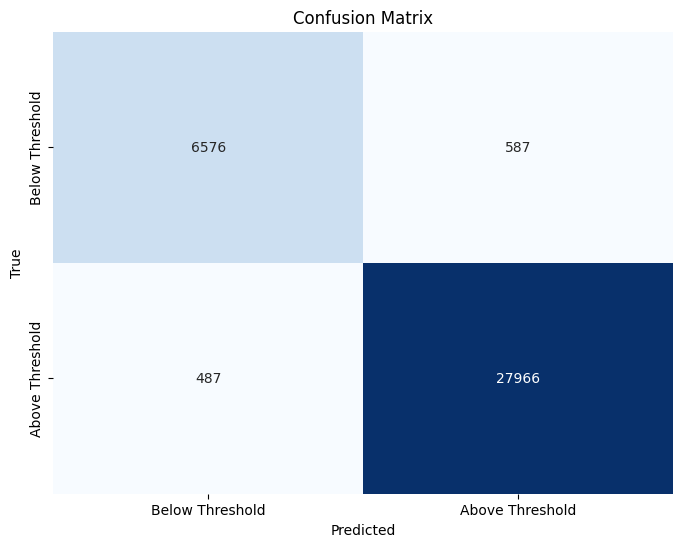

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Below Threshold', 'Above Threshold'],
            yticklabels=['Below Threshold', 'Above Threshold'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()